<a href="https://colab.research.google.com/github/athanasiosk-it13/DSRP-Top-Spotify-Songs-2023/blob/main/Spotify_Top_Songs_2023_Extensive_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1. Importing Required Dependencies for the Project

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#!pip install pandas
import pandas as pd

#!pip install numpy
import numpy as np

#!pip install matplotlib
import matplotlib.pyplot as plt

#!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

#!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

# Step 2. Imported the DataSet

In [ ]:
file_path = "spotify-2023.csv"
spotify_df = kagglehub.load_dataset(
KaggleDatasetAdapter.PANDAS,"nelgiriyewithana/top-spotify-songs-2023",file_path, pandas_kwargs={'encoding': 'latin-1'})

In [ ]:
spotify_df.head(18)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


# Step 3. Doing Some Data Analysis and Figuring Out What to Clean and Filter

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Tracks                                                 953 non-null    object
 1   Artists                                                953 non-null    object
 2   # of Artists on Song                                   953 non-null    int64 
 3   Year It Released                                       953 non-null    int64 
 4   Month It Released                                      953 non-null    int64 
 5   Day It Released                                        953 non-null    int64 
 6   # of Playlists The Song is in on Spotify               953 non-null    int64 
 7   Song Place in Spotify Charts                           953 non-null    int64 
 8   # of Streams the Song has                              953 n

In [ ]:
spotify_df.columns

Index(['Tracks', 'Artists', '# of Artists on Song', 'Year It Released',
       'Month It Released', 'Day It Released',
       '# of Playlists The Song is in on Spotify',
       'Song Place in Spotify Charts', '# of Streams the Song has',
       '# of Playlists The Song is in on Apple Music',
       'Song Place in Apple Music Charts',
       '# of Playlists the Song is in on Deezer',
       'Song Place in Deezer Charts', 'Song Place in Shazam Charts',
       'The BPM of the Song', 'The Key of The Song',
       'If the Key is in Major or Minor Scale',
       'How Danacable the song is by %', 'How Positive the Song is in %',
       'Energy Level of the Song in %',
       'How Much Acoustic Sound is in the Song in %',
       'How Instrumental the Song is in %',
       'The presence of special live performance effects in %',
       '# of words sung in the song in %'],
      dtype='object')

In [ ]:
spotify_df.rename(columns={'track_name': 'Tracks', 'artist(s)_name': 'Artists','artist_count': '# of Artists on Song','released_year': 'Year It Released','released_month': 'Month It Released','released_day': 'Day It Released','in_spotify_playlists': '# of Playlists The Song is in on Spotify','in_spotify_charts': 'Song Place in Spotify Charts','streams': '# of Streams the Song has','in_apple_playlists': '# of Playlists The Song is in on Apple Music','in_apple_charts': 'Song Place in Apple Music Charts','in_deezer_playlists': '# of Playlists the Song is in on Deezer','in_deezer_charts': 'Song Place in Deezer Charts','in_shazam_charts': 'Song Place in Shazam Charts','bpm': 'The BPM of the Song','key': 'The Key of The Song','mode': 'If the Key is in Major or Minor Scale','danceability_%': 'How Danacable the song is by %','valence_%': 'How Positive the Song is in %','energy_%': 'Energy Level of the Song in %','acousticness_%': 'How Much Acoustic Sound is in the Song in %','instrumentalness_%': 'How Instrumental the Song is in %','liveness_%': 'The presence of special live performance effects in %','speechiness_%': '# of words sung in the song in %',}, inplace=True)

In [ ]:
spotify_df.drop_duplicates(inplace=True)

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Tracks                                                 817 non-null    object
 1   Artists                                                817 non-null    object
 2   # of Artists on Song                                   817 non-null    int64 
 3   Year It Released                                       817 non-null    int64 
 4   Month It Released                                      817 non-null    int64 
 5   Day It Released                                        817 non-null    int64 
 6   # of Playlists The Song is in on Spotify               817 non-null    int64 
 7   Song Place in Spotify Charts                           817 non-null    int64 
 8   # of Streams the Song has                              817 non-nu

In [ ]:
spotify_df.shape

(953, 24)

In [ ]:
spotify_df['The Key of The Song'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

# Step 4. Reasearch Questions To Think About!



Do these specific features of songs have the effect of the number of streams or charts?

Do these specific features of songs have the effect of the danceability and instrumental and acoustic?

Do these specific features of songs have the effect of the energy and # words sung and acoustic and artists?

# Step 5. Cleaning Up the Null Values In this DataSet

In [ ]:
spotify_df[spotify_df['The Key of The Song'].isnull()]

,Tracks,Artists,# of Artists on Song,Year It Released,Month It Released,Day It Released,# of Playlists The Song is in on Spotify,Song Place in Spotify Charts,# of Streams the Song has,# of Playlists The Song is in on Apple Music,...,The BPM of the Song,The Key of The Song,If the Key is in Major or Minor Scale,How Danacable the song is by %,How Positive the Song is in %,Energy Level of the Song in %,How Much Acoustic Sound is in the Song in %,How Instrumental the Song is in %,The presence of special live performance effects in %,# of words sung in the song in %


In [ ]:
null_shazam_values=spotify_df[spotify_df['Song Place in Shazam Charts'].isnull()]

print("Rows with null values in 'Song Place in Shazam Charts':")
null_shazam_values.head(50)

Rows with null values in 'Song Place in Shazam Charts':


,Tracks,Artists,# of Artists on Song,Year It Released,Month It Released,Day It Released,# of Playlists The Song is in on Spotify,Song Place in Spotify Charts,# of Streams the Song has,# of Playlists The Song is in on Apple Music,...,The BPM of the Song,The Key of The Song,If the Key is in Major or Minor Scale,How Danacable the song is by %,How Positive the Song is in %,Energy Level of the Song in %,How Much Acoustic Sound is in the Song in %,How Instrumental the Song is in %,The presence of special live performance effects in %,# of words sung in the song in %
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,...,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,...,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,...,124,A#,Major,61,41,81,5,2,10,3
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,95,Unknown,Major,55,56,82,12,0,34,5
158,Ghost,Justin Bieber,1,2021,3,19,5866,24,1167330737,107,...,154,D,Major,61,41,74,21,0,40,6
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4
180,Night Changes,One Direction,1,2014,11,17,7124,18,1131090940,60,...,120,G#,Major,67,40,52,86,0,12,4


In [ ]:
import requests
import pandas as pd
import base64
import time

CLIENT_ID = 'c14c8649a3a347c18d92aa580551eb16'
CLIENT_SECRET = 'afd7cc8ec2314138ae5aae7c7cb54db9'

def get_token(client_id, client_secret):
    auth_str = f"{client_id}:{client_secret}"
    b64_auth_str = base64.b64encode(auth_str.encode()).decode()
    url = 'https://accounts.spotify.com/api/token'
    headers = {'Authorization': f'Basic {b64_auth_str}'}
    data = {'grant_type': 'client_credentials'}
    response = requests.post(url, headers=headers, data=data)
    return response.json()['access_token']

# 2. Spotify key map
key_map = {
    -1: 'Unknown',
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
}

# 3. Search for track ID using name and artist
def search_track_id(track_name, artist_name, headers):
    query = f'track:{track_name} artist:{artist_name}'
    url = 'https://api.spotify.com/v1/search'
    params = {'q': query, 'type': 'track', 'limit': 1}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        return None
    results = response.json()
    tracks = results.get('tracks', {}).get('items', [])
    return tracks[0]['id'] if tracks else None

# 4. Get the musical key using the track ID
def get_track_key(track_id, headers):
    if not track_id:
        return -1
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return -1
    data = response.json()
    return data.get('key', -1)
# 6. Get access token
token = get_token(CLIENT_ID, CLIENT_SECRET)
headers = {'Authorization': f'Bearer {token}'}

# 7. Log unknowns
unknown_keys = []

# 8. Fill in missing key values
for idx, row in spotify_df[spotify_df['The Key of The Song'].isnull()].iterrows():
    track_name = row['Tracks']
    artist_name = row['Artists']

    track_id = search_track_id(track_name, artist_name, headers)
    key_number = get_track_key(track_id, headers)
    key_name = key_map.get(key_number, 'Unknown')

    spotify_df.at[idx, 'The Key of The Song'] = key_name

    if key_name == 'Unknown':
        unknown_keys.append({
            'Index': idx,
            'Track': track_name,
            'Artist': artist_name
        })

    time.sleep(0.2)  # Avoid rate limits
# Convert existing numeric keys to names as well
def convert_key_value(val):
    if isinstance(val, int):
        return key_map.get(val, 'Unknown')
    return val

spotify_df['The Key of The Song'] = spotify_df['The Key of The Song'].apply(convert_key_value)


In [ ]:
spotify_df= spotify_df[spotify_df["The Key of The Song"] != 'Unknown']
spotify_df.dropna(subset=['Song Place in Shazam Charts'],inplace=True)

# Step 6. Creating A Visualization for the Spotify 2023 DataSet.

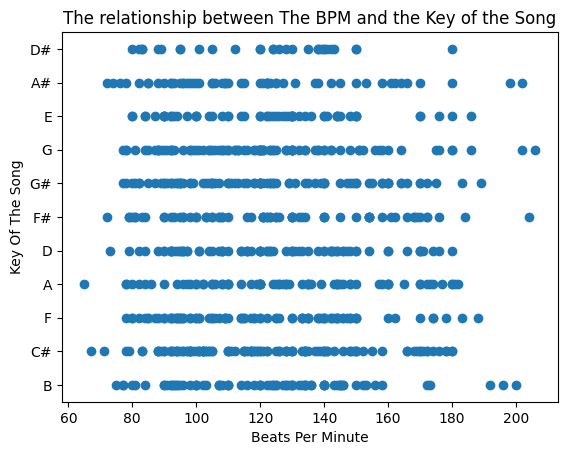

In [ ]:
plt.scatter(spotify_df['The BPM of the Song'], spotify_df['The Key of The Song'])
plt.title("The relationship between The BPM and the Key of the Song")
plt.xlabel('Beats Per Minute')
plt.ylabel('Key Of The Song')
plt.show()